In [1]:
#Import des données


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')


# Configuration visuelle cohérente
plt.style.use('dark_background')
sns.set_palette("husl")


# Couleurs du thème cinéma
COLORS = {
   'primary': '#E50914',      # Rouge
   'secondary': '#D4AF37',    # Or
   'success': '#00C853',      # Vert
   'danger': '#E50914',       # Rouge
   'neutral': '#1E88E5',      # Bleu
   'background': '#141414',   # Noir
}


plt.rcParams.update({
   'figure.figsize': (14, 6),
   'figure.facecolor': '#141414',
   'axes.facecolor': '#1a1a1a',
   'font.size': 11,
   'axes.labelsize': 12,
   'axes.titlesize': 14,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'legend.fontsize': 10,
   'figure.titlesize': 16
})


print("✅ Configuration chargée")


# Charger le dataset nettoyé
df = pd.read_csv('../data/processed/movies_clean.csv')
print(f"📊 Dataset chargé : {len(df):,} films")


✅ Configuration chargée
📊 Dataset chargé : 7,632 films


✅ Configuration chargée
📊 Dataset chargé : 7,630 films
📅 Période : 1980 - 2023

CHAPITRE 1 : CONTEXTE DU MARCHÉ

📈 Graphique 1.1 : Évolution de la production


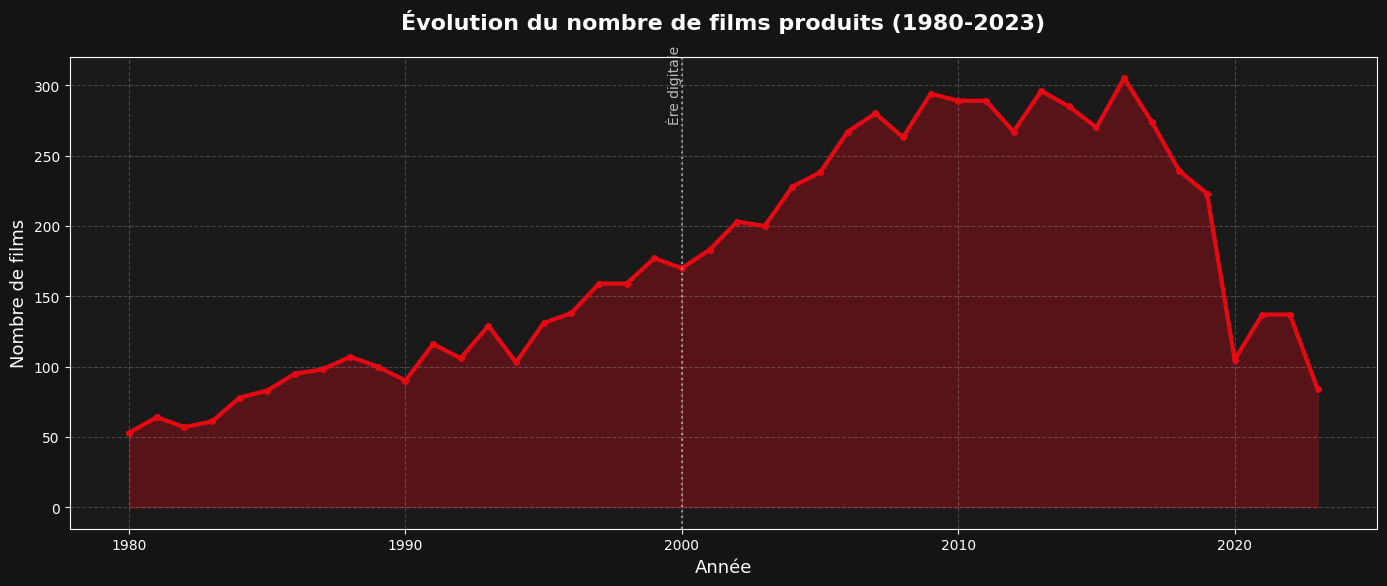

💾 Sauvegardé : chap1_01_production_evolution.png

💰 Graphique 1.2 : Budget et revenus moyens


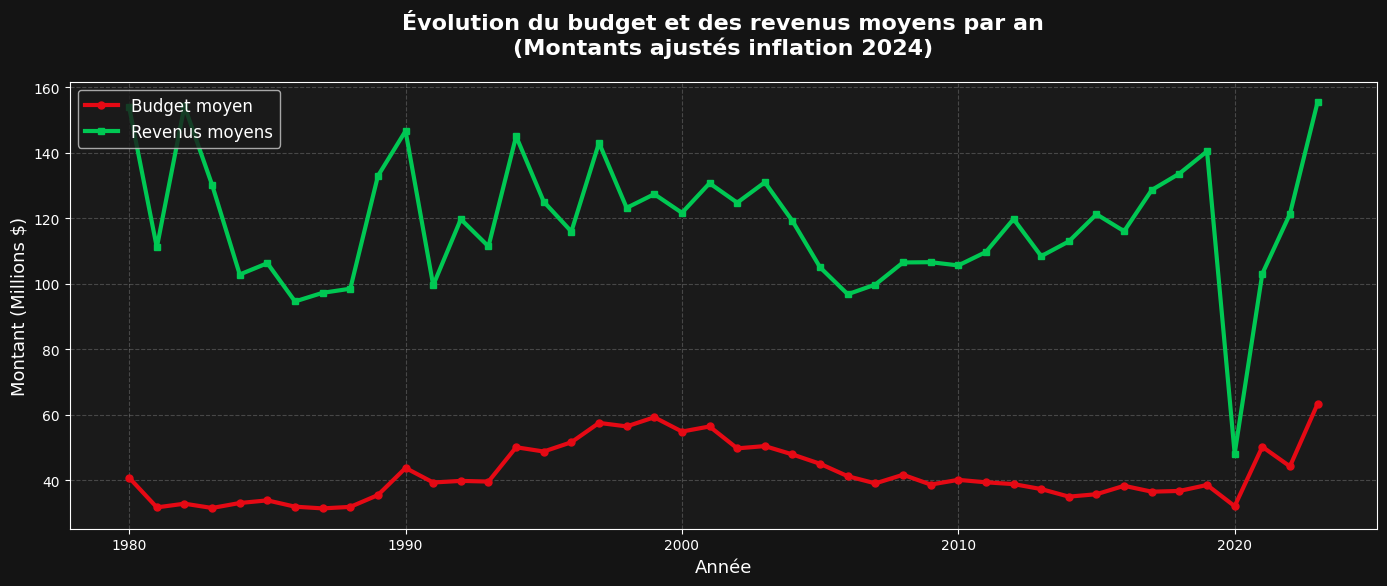

💾 Sauvegardé : chap1_02_financial_evolution.png

🌐 Graphique 1.3 : Top 15 langues


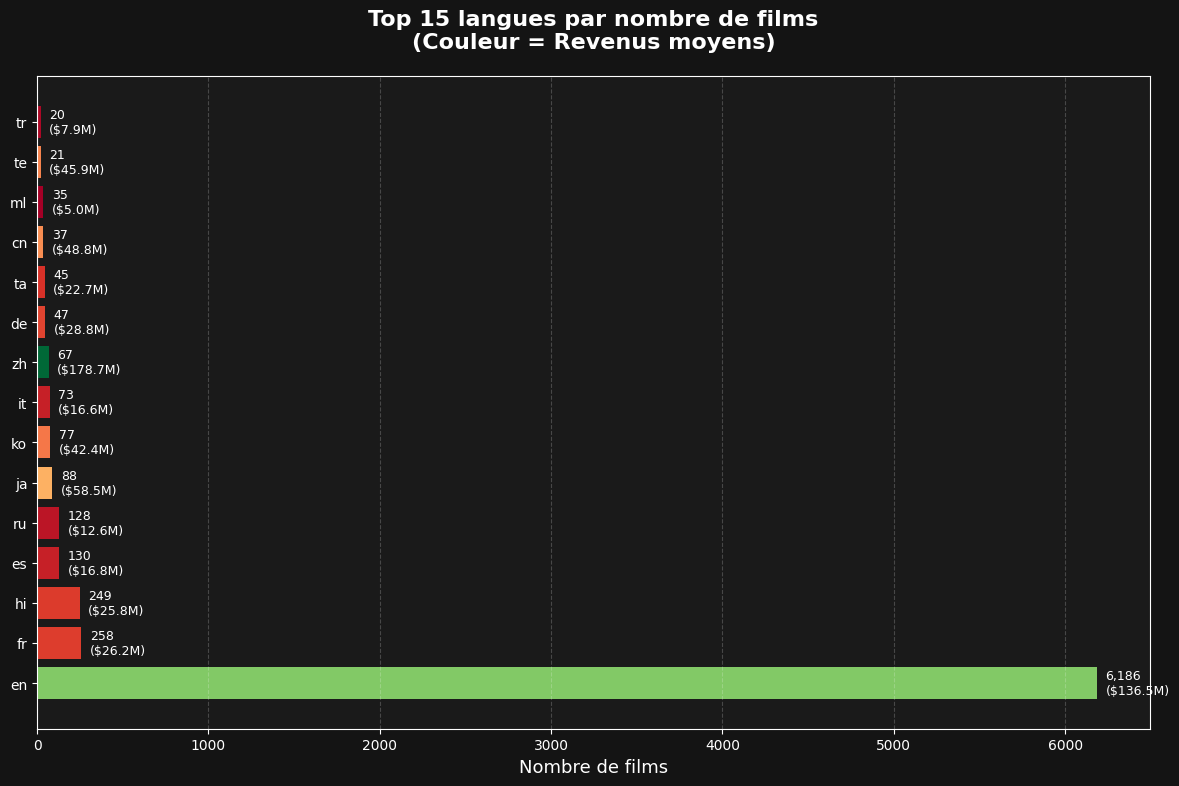

💾 Sauvegardé : chap1_03_language_diversity.png

⏱️ Graphique 1.4 : Runtime par décennie


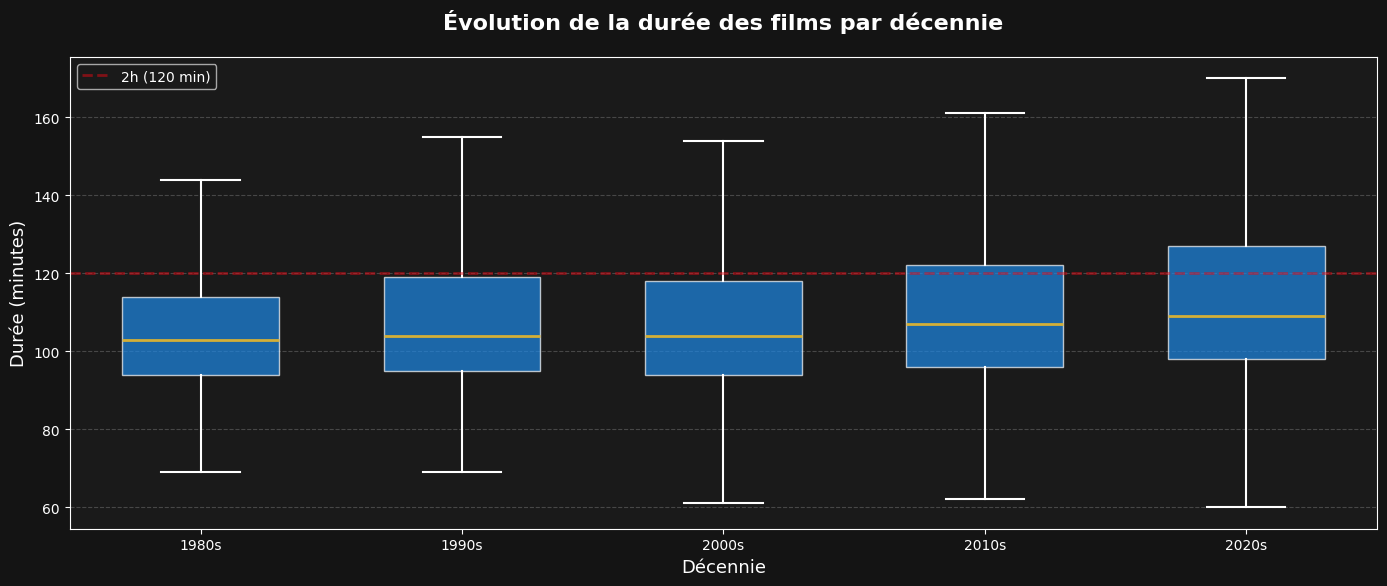

💾 Sauvegardé : chap1_04_runtime_evolution.png

✅ CHAPITRE 1 TERMINÉ : 4 graphiques créés

📁 Fichiers sauvegardés :
   - chap1_01_production_evolution.png
   - chap1_02_financial_evolution.png
   - chap1_03_language_diversity.png
   - chap1_04_runtime_evolution.png


In [ ]:
"""
================================================================================
CHAPITRE 1 : CONTEXTE DU MARCHÉ
================================================================================
4 graphiques statiques : Production, Finances, Langues, Durée
"""

# ==============================================================================
# IMPORTS ET CONFIGURATION
# ==============================================================================


warnings.filterwarnings('ignore')

# Configuration visuelle - Thème cinéma
plt.style.use('dark_background')
sns.set_palette("husl")

COLORS = {
    'primary': '#E50914',      # Rouge cinéma
    'secondary': '#D4AF37',    # Or
    'success': '#00C853',      # Vert
    'danger': '#E50914',       # Rouge
    'neutral': '#1E88E5',      # Bleu
    'background': '#141414',   # Noir
}

plt.rcParams.update({
    'figure.figsize': (14, 6),
    'figure.facecolor': '#141414',
    'axes.facecolor': '#1a1a1a',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

print("✅ Configuration chargée")

# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================

df = pd.read_csv('../data/processed/movies_clean.csv')

# Créer le dossier outputs
os.makedirs('../outputs/figures', exist_ok=True)

print(f"📊 Dataset chargé : {len(df):,} films")
print(f"📅 Période : {int(df['release_year'].min())} - {int(df['release_year'].max())}")

print("\n" + "="*80)
print("CHAPITRE 1 : CONTEXTE DU MARCHÉ")
print("="*80)

# ==============================================================================
# GRAPHIQUE 1.1 : ÉVOLUTION DU NOMBRE DE FILMS
# ==============================================================================

print("\n📈 Graphique 1.1 : Évolution de la production")

fig, ax = plt.subplots(figsize=(14, 6))

films_per_year = df.groupby('release_year').size()

ax.plot(films_per_year.index, films_per_year.values, 
        linewidth=3, color=COLORS['primary'], marker='o', markersize=4)
ax.fill_between(films_per_year.index, films_per_year.values, 
                alpha=0.3, color=COLORS['primary'])

ax.set_title('Évolution du nombre de films produits (1980-2023)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Année', fontsize=13)
ax.set_ylabel('Nombre de films', fontsize=13)
ax.grid(True, alpha=0.2, linestyle='--')

# Annotations événements majeurs
ax.axvline(x=2000, color='white', linestyle=':', alpha=0.5, linewidth=1.5)
ax.text(2000, films_per_year.max() * 0.9, 'Ère digitale', 
        rotation=90, fontsize=10, alpha=0.7, ha='right')

plt.tight_layout()
plt.savefig('../outputs/figures/chap1_01_production_evolution.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap1_01_production_evolution.png")

# ==============================================================================
# GRAPHIQUE 1.2 : ÉVOLUTION FINANCIÈRE
# ==============================================================================

print("\n💰 Graphique 1.2 : Budget et revenus moyens")

fig, ax = plt.subplots(figsize=(14, 6))

yearly_finance = df.groupby('release_year').agg({
    'budget_million': 'mean',
    'revenue_million': 'mean'
}).reset_index()

ax.plot(yearly_finance['release_year'], yearly_finance['budget_million'],
        label='Budget moyen', linewidth=3, color=COLORS['danger'], 
        marker='o', markersize=5)
ax.plot(yearly_finance['release_year'], yearly_finance['revenue_million'],
        label='Revenus moyens', linewidth=3, color=COLORS['success'], 
        marker='s', markersize=5)

ax.set_title('Évolution du budget et des revenus moyens par an\n(Montants ajustés inflation 2024)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Année', fontsize=13)
ax.set_ylabel('Montant (Millions $)', fontsize=13)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.2, linestyle='--')

plt.tight_layout()
plt.savefig('../outputs/figures/chap1_02_financial_evolution.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap1_02_financial_evolution.png")

# ==============================================================================
# GRAPHIQUE 1.3 : DIVERSITÉ LINGUISTIQUE
# ==============================================================================

print("\n🌐 Graphique 1.3 : Top 15 langues")

fig, ax = plt.subplots(figsize=(12, 8))

# Top 15 langues par volume
lang_counts = df['original_language'].value_counts().head(15)
lang_revenue = df.groupby('original_language')['revenue_million'].mean()

# DataFrame combiné
lang_df = pd.DataFrame({
    'count': lang_counts,
    'avg_revenue': lang_revenue[lang_counts.index]
})

# Couleurs selon revenus (gradient)
colors = plt.cm.RdYlGn(
    (lang_df['avg_revenue'] - lang_df['avg_revenue'].min()) / 
    (lang_df['avg_revenue'].max() - lang_df['avg_revenue'].min())
)

bars = ax.barh(range(len(lang_df)), lang_df['count'], color=colors)

ax.set_yticks(range(len(lang_df)))
ax.set_yticklabels(lang_df.index)
ax.set_xlabel('Nombre de films', fontsize=13)
ax.set_title('Top 15 langues par nombre de films\n(Couleur = Revenus moyens)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.2, linestyle='--')

# Ajouter valeurs
for i, (count, revenue) in enumerate(zip(lang_df['count'], lang_df['avg_revenue'])):
    ax.text(count + 50, i, f'{count:,}\n(${revenue:.1f}M)', 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/figures/chap1_03_language_diversity.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap1_03_language_diversity.png")

# ==============================================================================
# GRAPHIQUE 1.4 : DURÉE DES FILMS
# ==============================================================================

print("\n⏱️ Graphique 1.4 : Runtime par décennie")

fig, ax = plt.subplots(figsize=(14, 6))

decades = sorted(df['decade'].unique())
runtime_by_decade = [df[df['decade'] == d]['runtime'] for d in decades]

bp = ax.boxplot(runtime_by_decade, 
                labels=[f"{int(d)}s" for d in decades],
                patch_artist=True,
                widths=0.6,
                showfliers=False)

# Colorer les boxes
for patch in bp['boxes']:
    patch.set_facecolor(COLORS['neutral'])
    patch.set_alpha(0.7)

for whisker in bp['whiskers']:
    whisker.set(color='white', linewidth=1.5)

for cap in bp['caps']:
    cap.set(color='white', linewidth=1.5)

for median in bp['medians']:
    median.set(color=COLORS['secondary'], linewidth=2)

ax.set_title('Évolution de la durée des films par décennie', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Décennie', fontsize=13)
ax.set_ylabel('Durée (minutes)', fontsize=13)
ax.grid(axis='y', alpha=0.2, linestyle='--')

# Ligne de référence 2h
ax.axhline(y=120, color=COLORS['danger'], linestyle='--', 
           alpha=0.5, linewidth=2, label='2h (120 min)')
ax.legend()

plt.tight_layout()
plt.savefig('../outputs/figures/chap1_04_runtime_evolution.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap1_04_runtime_evolution.png")

# ==============================================================================
# RÉSUMÉ
# ==============================================================================

print("\n" + "="*80)
print("✅ CHAPITRE 1 TERMINÉ : 4 graphiques créés")
print("="*80)
print("\n📁 Fichiers sauvegardés :")
print("   - chap1_01_production_evolution.png")
print("   - chap1_02_financial_evolution.png")
print("   - chap1_03_language_diversity.png")
print("   - chap1_04_runtime_evolution.png")



🎯 Graphique 2.0 : Concentration du marché


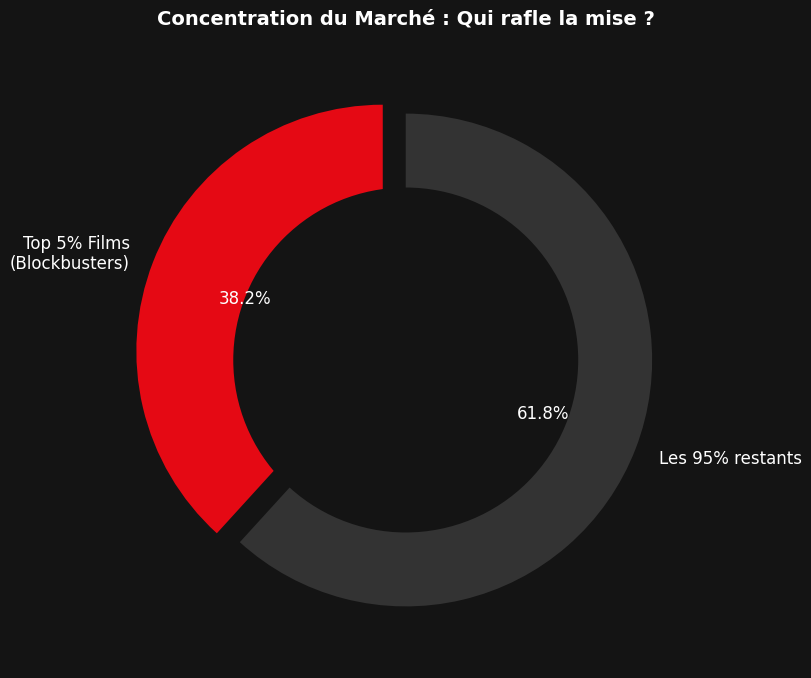


🍩 Graphique 2.1 : Taux de rentabilité


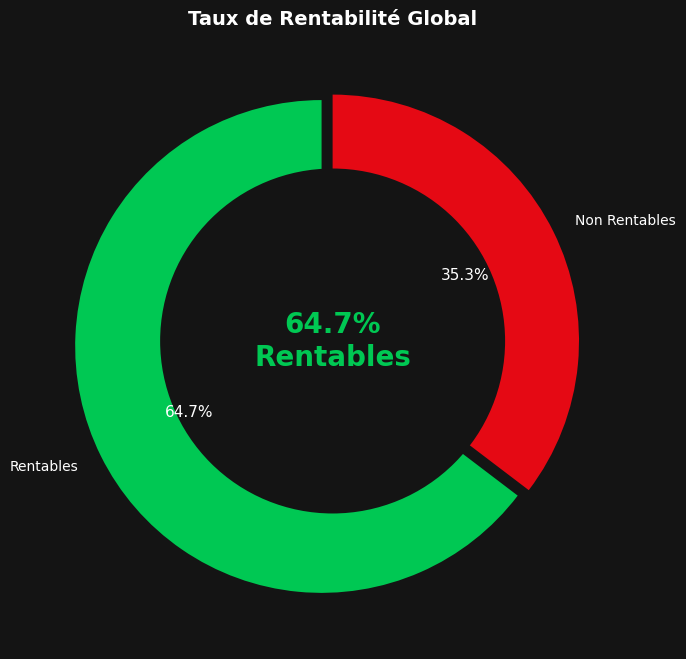


📊 Graphique 2.2 : Distribution du ROI (Fix)


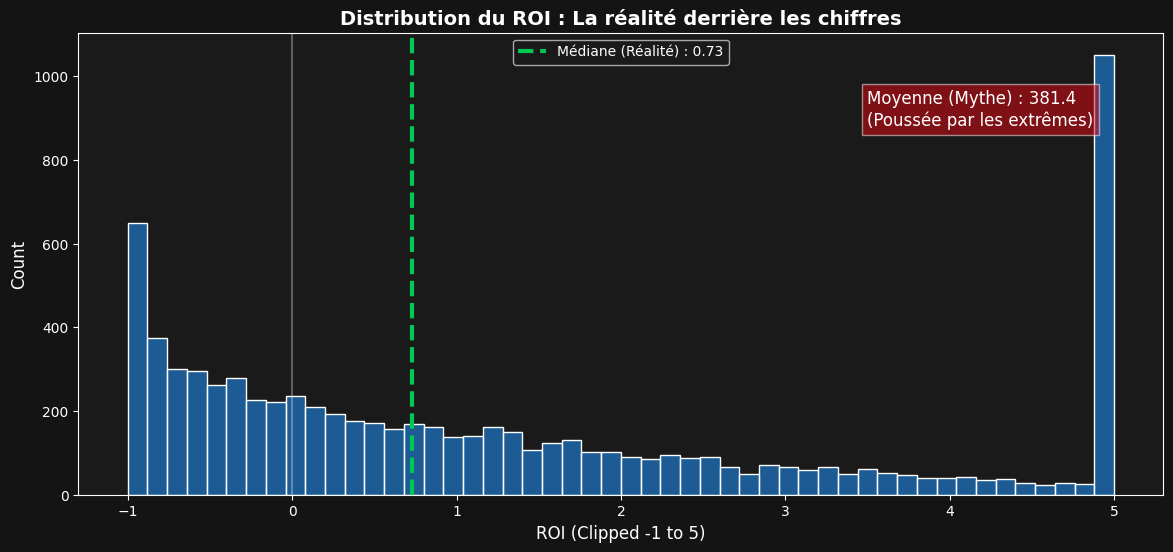


💵 Graphique 2.4 : ROI Médian par catégorie


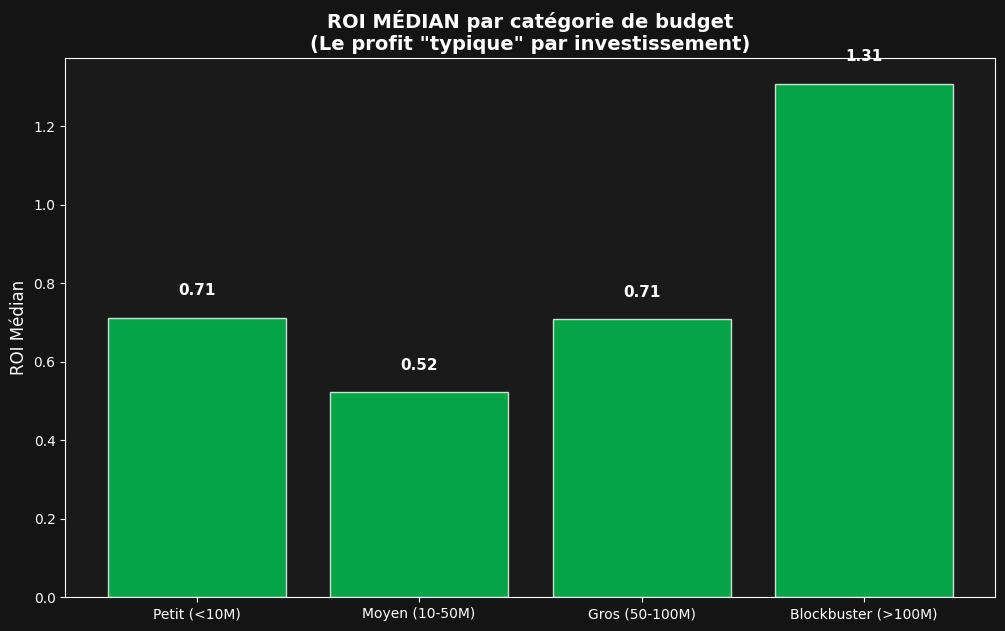

In [14]:
"""
================================================================================
CHAPITRE 2 : ANALYSE DE LA RENTABILITÉ ET DU RISQUE
================================================================================
"""


warnings.filterwarnings('ignore')

# Style Cinéma
plt.style.use('dark_background')
COLORS = {
    'primary': '#E50914',      # Rouge Netflix
    'secondary': '#D4AF37',    # Or
    'success': '#00C853',      # Vert
    'danger': '#E50914',       # Rouge
    'neutral': '#1E88E5',      # Bleu
    'background': '#141414',   # Noir
}

plt.rcParams.update({
    'figure.figsize': (14, 6),
    'figure.facecolor': '#141414',
    'axes.facecolor': '#1a1a1a',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'figure.titlesize': 16
})

# Chargement
df = pd.read_csv('../data/processed/movies_clean.csv')
# --- FILTRAGE STATISTIQUE (Nouveau) ---
# On retire les genres ayant moins de 10 films pour éviter les "bruits" statistiques
# qui faussent les moyennes/médianes (ex: TV Movie, Unknown)
df = df.groupby('main_genre').filter(lambda x: len(x) >= 10)
os.makedirs('../outputs/figures', exist_ok=True)

# ==============================================================================
# GRAPHIQUE 2.0 : CONCENTRATION DU MARCHÉ (NOUVEAU)
# ==============================================================================
print("\n🎯 Graphique 2.0 : Concentration du marché")

df_sorted = df.sort_values('revenue_million', ascending=False)
top_5_count = int(len(df) * 0.05)
top_5_rev = df_sorted.head(top_5_count)['revenue_million'].sum()
total_rev = df['revenue_million'].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie([top_5_rev, total_rev - top_5_rev], 
        labels=['Top 5% Films\n(Blockbusters)', 'Les 95% restants'],
        autopct='%1.1f%%', colors=[COLORS['primary'], '#333333'],
        startangle=90, explode=(0.1, 0), textprops={'fontsize': 12})

# Donut hole
ax.add_artist(plt.Circle((0,0), 0.70, fc='#141414'))
ax.set_title('Concentration du Marché : Qui rafle la mise ?', fontweight='bold', pad=20)

plt.savefig('../outputs/figures/chap2_00_market_concentration.png', dpi=300)
plt.show()

# ==============================================================================
# GRAPHIQUE 2.1 : TAUX DE RENTABILITÉ GLOBAL
# ==============================================================================
print("\n🍩 Graphique 2.1 : Taux de rentabilité")

fig, ax = plt.subplots(figsize=(10, 8))
prof_count = df['is_profitable'].sum()
sizes = [prof_count, len(df) - prof_count]

ax.pie(sizes, labels=['Rentables', 'Non Rentables'], 
       colors=[COLORS['success'], COLORS['danger']],
       autopct='%1.1f%%', startangle=90, explode=(0.05, 0))

ax.add_artist(plt.Circle((0,0), 0.70, fc='#141414'))
ax.text(0, 0, f"{(prof_count/len(df)*100):.1f}%\nRentables", 
        ha='center', va='center', fontsize=20, fontweight='bold', color=COLORS['success'])

ax.set_title('Taux de Rentabilité Global', fontweight='bold')
plt.savefig('../outputs/figures/chap2_01_profitability.png', dpi=300)
plt.show()

# ==============================================================================
# GRAPHIQUE 2.2 : DISTRIBUTION DU ROI (VERSION CORRIGÉE)
# ==============================================================================
print("\n📊 Graphique 2.2 : Distribution du ROI (Fix)")

fig, ax = plt.subplots(figsize=(14, 6))
roi_clipped = df['roi'].clip(-1, 5)

# Histogramme
sns.histplot(roi_clipped, bins=50, color=COLORS['neutral'], alpha=0.6, ax=ax)

# Lignes de référence : On ne trace QUE le Médian pour ne pas casser l'échelle
median_roi = df['roi'].median()
ax.axvline(median_roi, color=COLORS['success'], linestyle='--', linewidth=3, 
           label=f'Médiane (Réalité) : {median_roi:.2f}')
ax.axvline(0, color='white', linestyle='-', alpha=0.3)

# Annotation pour la Moyenne (car elle est hors-champ)
ax.text(3.5, ax.get_ylim()[1]*0.8, 
        f"Moyenne (Mythe) : {df['roi'].mean():.1f}\n(Poussée par les extrêmes)", 
        bbox=dict(facecolor=COLORS['primary'], alpha=0.5), fontsize=12)

ax.set_title('Distribution du ROI : La réalité derrière les chiffres', fontweight='bold')
ax.set_xlabel('ROI (Clipped -1 to 5)')
ax.legend()
plt.savefig('../outputs/figures/chap2_02_roi_distribution.png', dpi=300)
plt.show()

# ==============================================================================
# GRAPHIQUE 2.4 : ROI MÉDIAN PAR BUDGET (PLUS PRÉCIS POUR L'INVESTISSEUR)
# ==============================================================================
print("\n💵 Graphique 2.4 : ROI Médian par catégorie")

# Calcul de la Médiane au lieu de la Moyenne
budget_roi = df.groupby('budget_category')['roi'].median().reset_index()
order = ['Petit (<10M)', 'Moyen (10-50M)', 'Gros (50-100M)', 'Blockbuster (>100M)']
budget_roi['budget_category'] = pd.Categorical(budget_roi['budget_category'], categories=order, ordered=True)
budget_roi = budget_roi.sort_values('budget_category')

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(budget_roi['budget_category'], budget_roi['roi'], 
              color=COLORS['success'], alpha=0.8, edgecolor='white')

ax.set_title('ROI MÉDIAN par catégorie de budget\n(Le profit "typique" par investissement)', fontweight='bold')
ax.set_ylabel('ROI Médian')

# Ajout des labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.savefig('../outputs/figures/chap2_04_median_budget_roi.png', dpi=300)
plt.show()

✅ Configuration chargée
📊 Dataset chargé : 7,630 films

CHAPITRE 3 : FACTEURS DE SUCCÈS

🎭 Graphique 3.1 : ROI moyen par genre


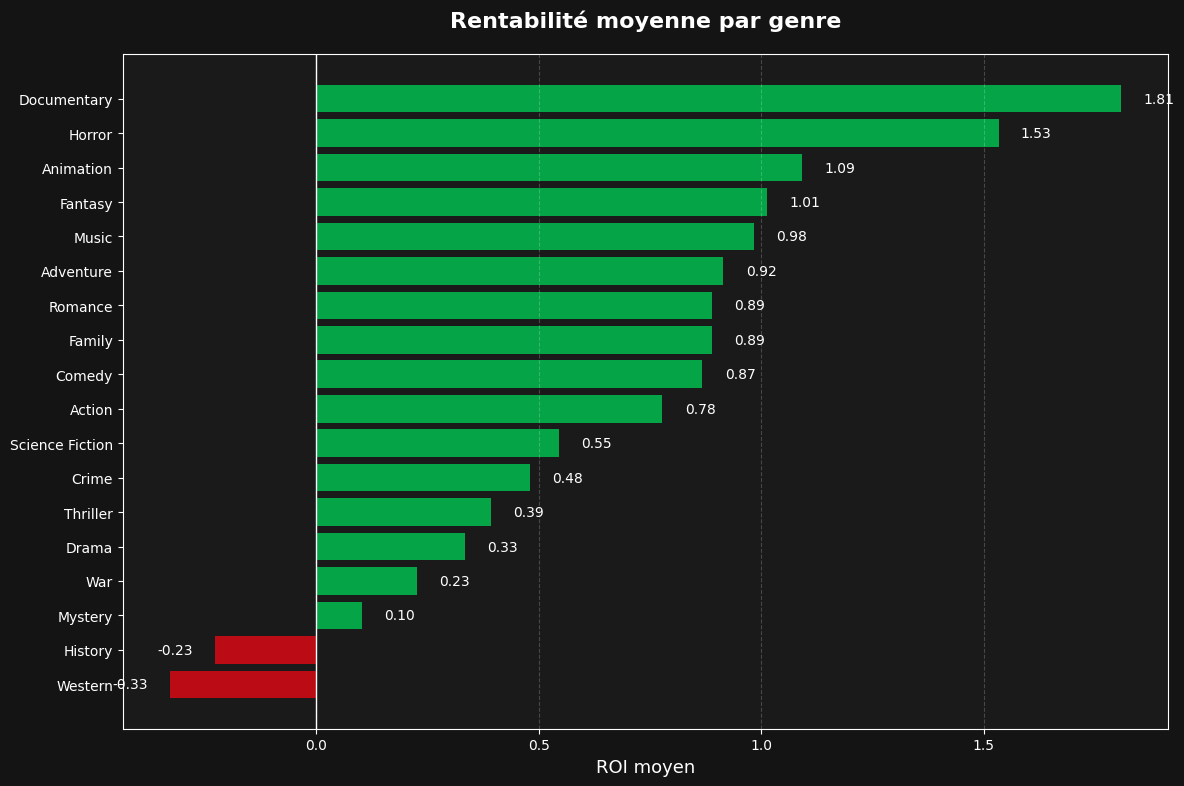

💾 Sauvegardé : chap3_01_roi_by_genre.png

💰 Graphique 3.2 : Budget et Revenue par genre


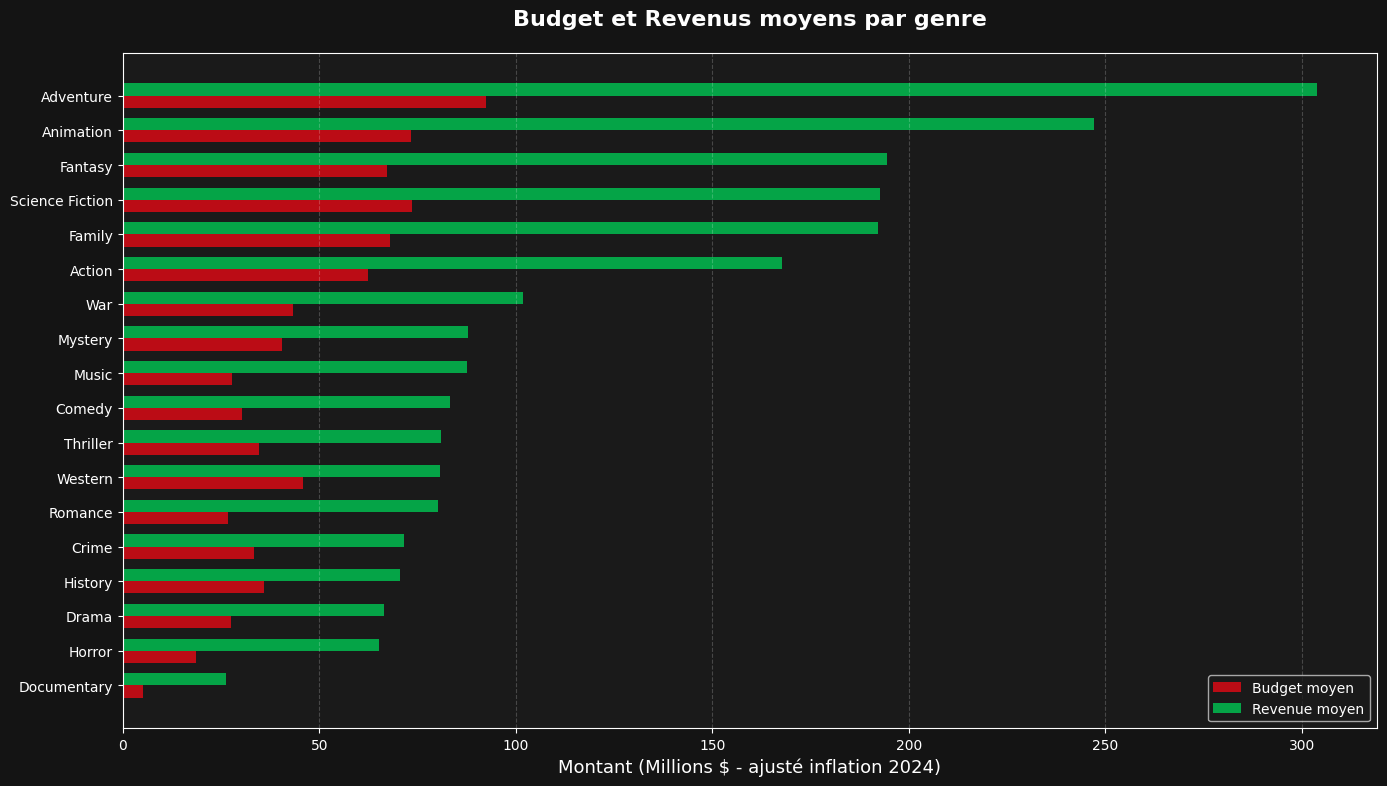

💾 Sauvegardé : chap3_02_budget_revenue_by_genre.png

📊 Graphique 3.3 : Volume par genre


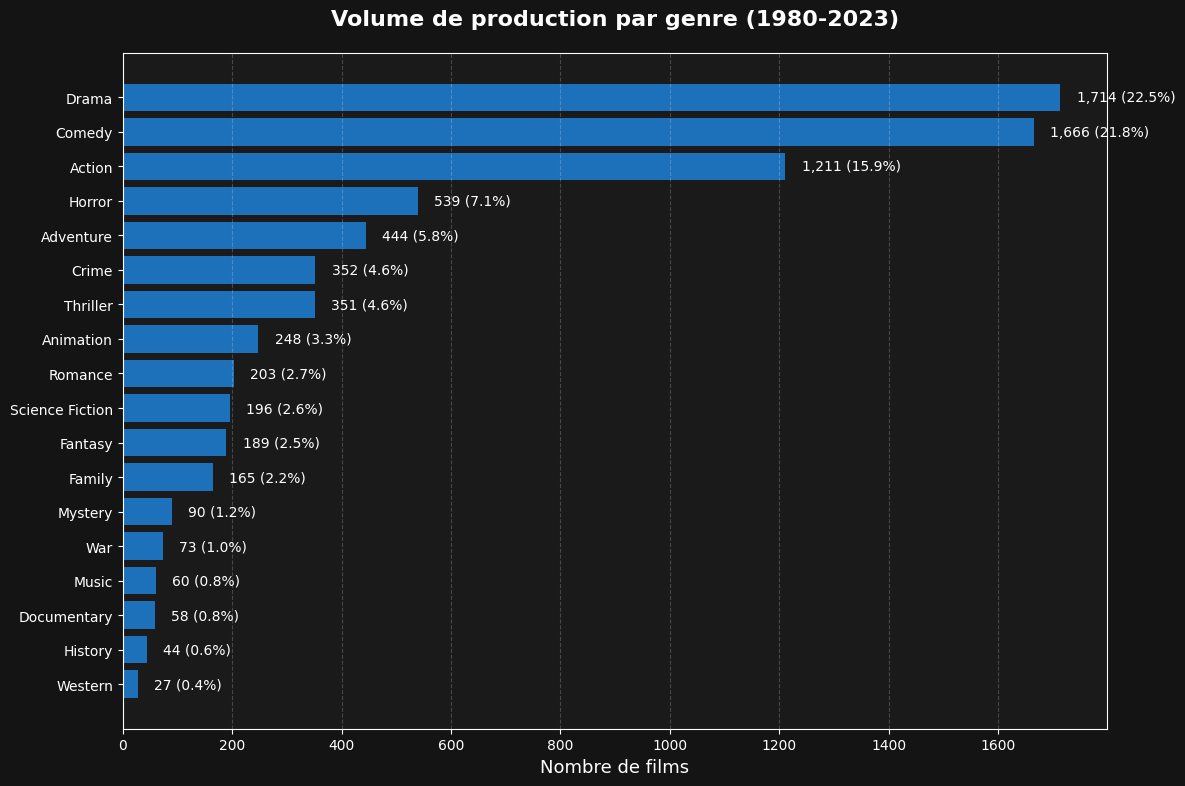

💾 Sauvegardé : chap3_03_volume_by_genre.png

🗓️ Graphique 3.4 : Saisonnalité


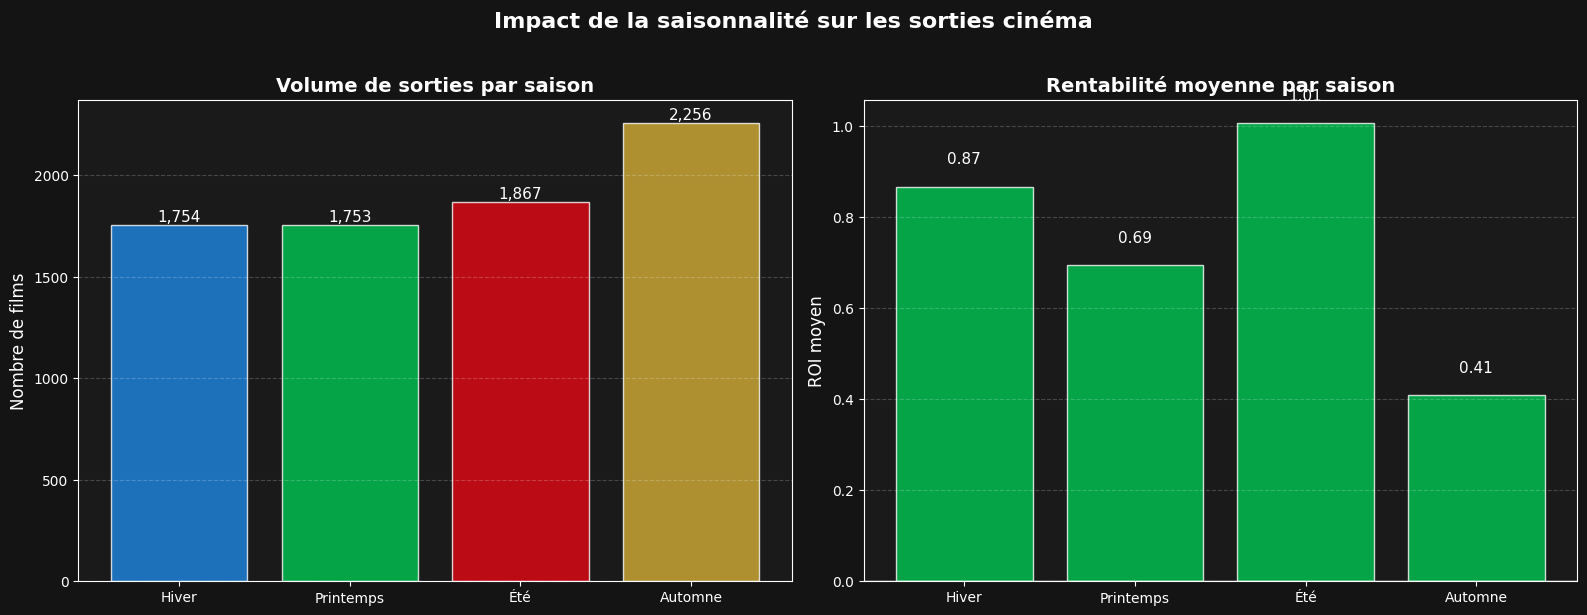

💾 Sauvegardé : chap3_04_seasonality.png

⭐ Graphique 3.5 : Impact popularité


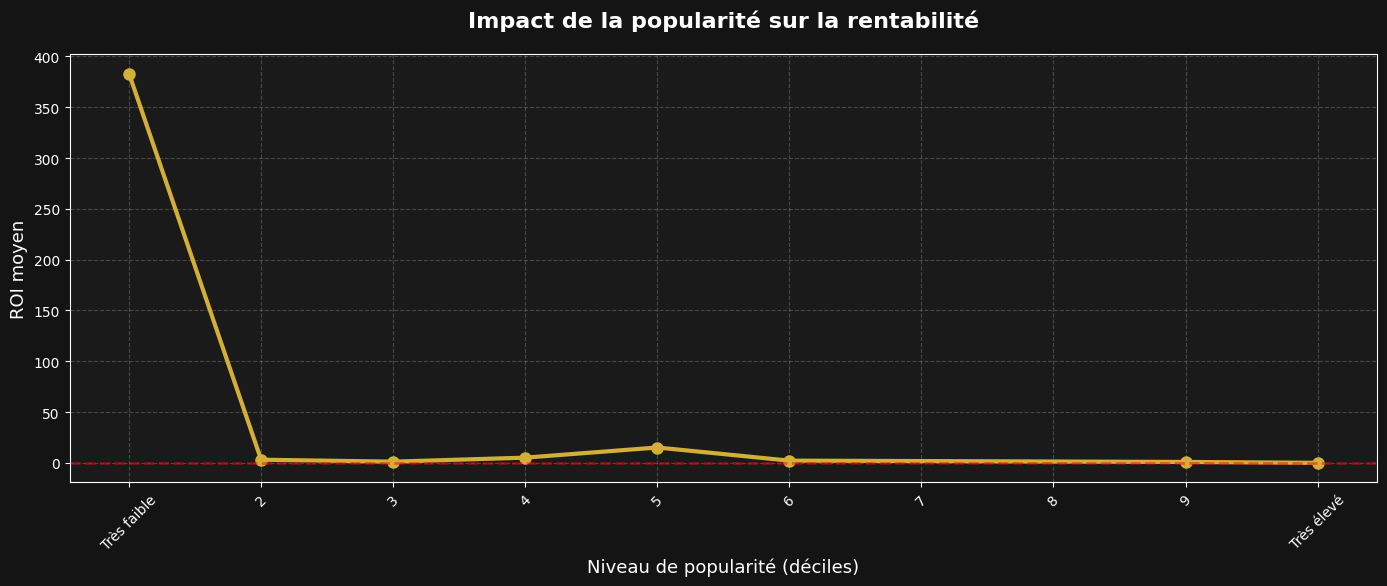

💾 Sauvegardé : chap3_05_popularity_impact.png

🌟 Graphique 3.6 : Impact note moyenne


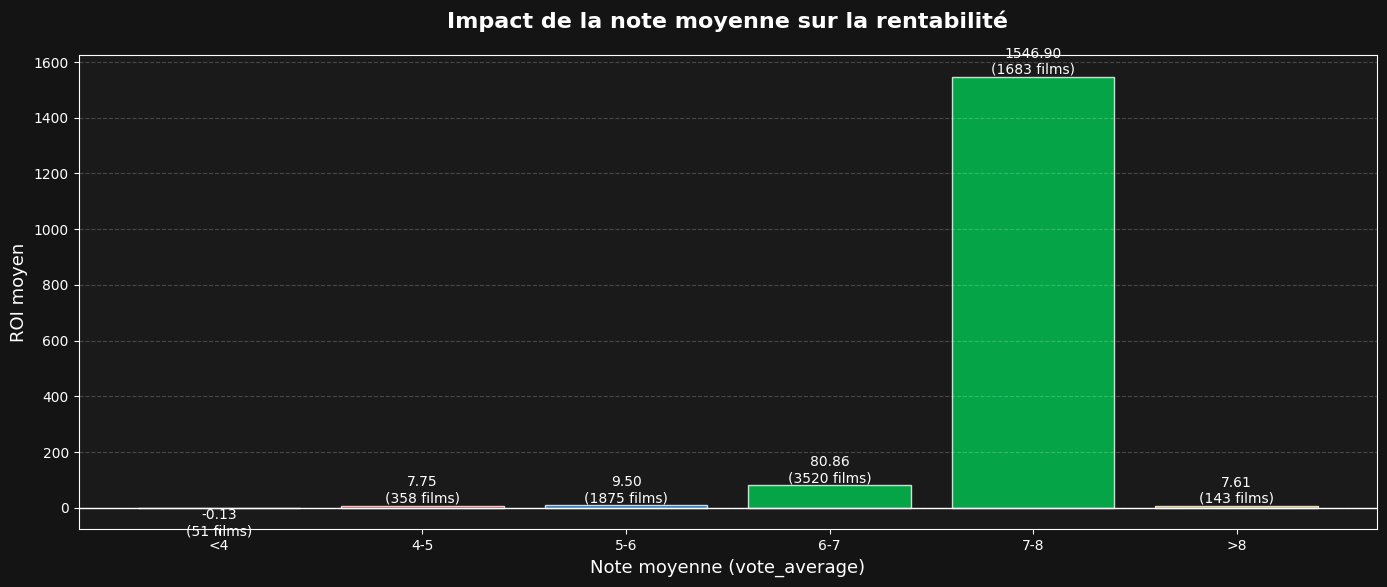

💾 Sauvegardé : chap3_06_rating_impact.png

🔗 Graphique 3.7 : Matrice de corrélation


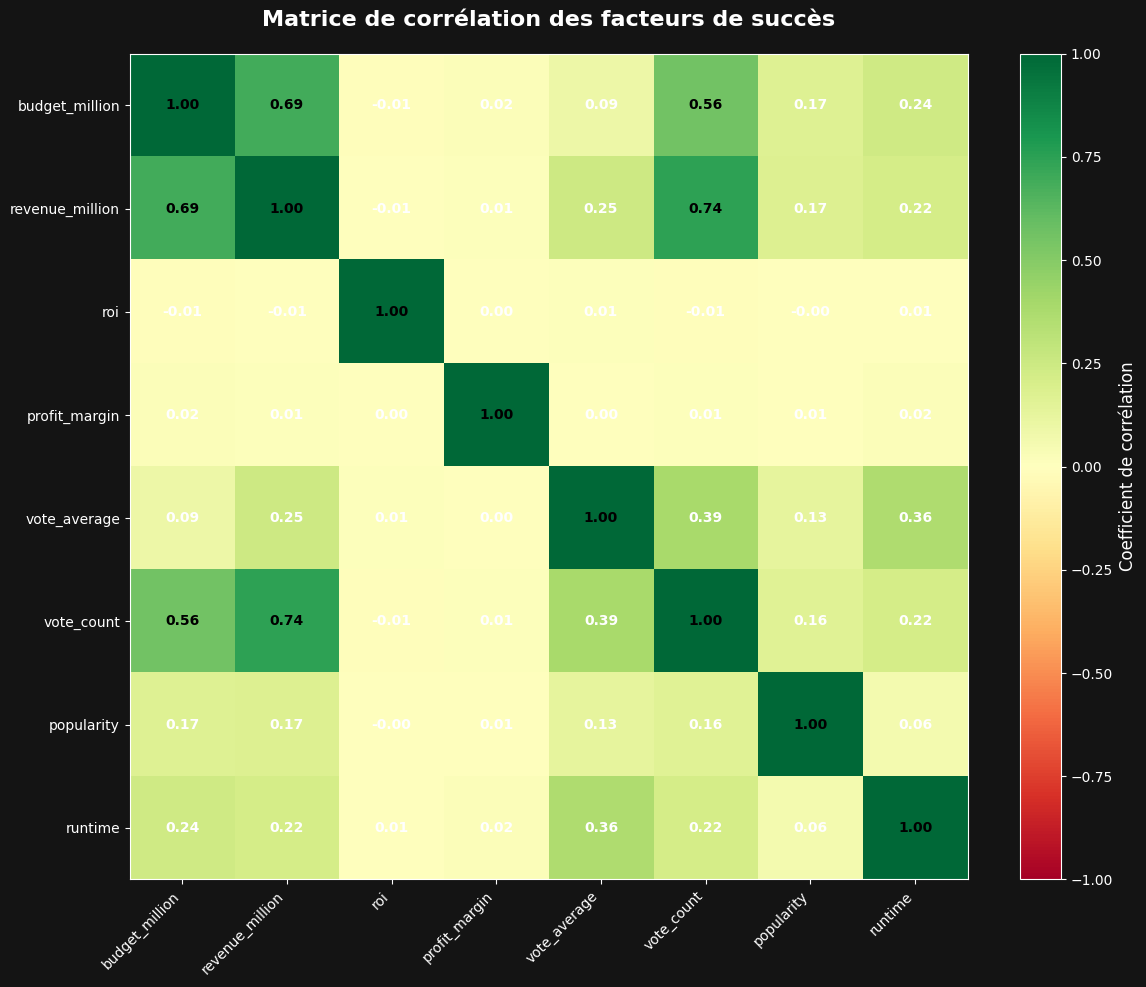

💾 Sauvegardé : chap3_07_correlation_matrix.png

✅ CHAPITRE 3 TERMINÉ : 7 graphiques créés

📁 Fichiers sauvegardés :
   - chap3_01_roi_by_genre.png
   - chap3_02_budget_revenue_by_genre.png
   - chap3_03_volume_by_genre.png
   - chap3_04_seasonality.png
   - chap3_05_popularity_impact.png
   - chap3_06_rating_impact.png
   - chap3_07_correlation_matrix.png


In [15]:
"""
================================================================================
CHAPITRE 3 : FACTEURS DE SUCCÈS
================================================================================
7 graphiques statiques : Genres, Saisonnalité, Popularité, Notes, Corrélation
"""

# ==============================================================================
# IMPORTS ET CONFIGURATION
# ==============================================================================


warnings.filterwarnings('ignore')

# Configuration visuelle - Thème cinéma
plt.style.use('dark_background')
sns.set_palette("husl")

COLORS = {
    'primary': '#E50914',
    'secondary': '#D4AF37',
    'success': '#00C853',
    'danger': '#E50914',
    'neutral': '#1E88E5',
    'background': '#141414',
}

plt.rcParams.update({
    'figure.figsize': (14, 6),
    'figure.facecolor': '#141414',
    'axes.facecolor': '#1a1a1a',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

print("✅ Configuration chargée")

# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================

df = pd.read_csv('../data/processed/movies_clean.csv')
# --- FILTRAGE STATISTIQUE (Nouveau) ---
# On retire les genres ayant moins de 10 films pour éviter les "bruits" statistiques
# qui faussent les moyennes/médianes (ex: TV Movie, Unknown)
df = df.groupby('main_genre').filter(lambda x: len(x) >= 10)
os.makedirs('../outputs/figures', exist_ok=True)

print(f"📊 Dataset chargé : {len(df):,} films")

print("\n" + "="*80)
print("CHAPITRE 3 : FACTEURS DE SUCCÈS")
print("="*80)

# ==============================================================================
# GRAPHIQUE 3.1 : ROI PAR GENRE
# ==============================================================================

print("\n🎭 Graphique 3.1 : ROI moyen par genre")

fig, ax = plt.subplots(figsize=(12, 8))

genre_roi = df.groupby('main_genre')['roi'].median().sort_values(ascending=True)
colors_genre = [COLORS['success'] if x > 0 else COLORS['danger'] for x in genre_roi.values]

bars = ax.barh(range(len(genre_roi)), genre_roi.values, color=colors_genre, alpha=0.8)

ax.set_yticks(range(len(genre_roi)))
ax.set_yticklabels(genre_roi.index)
ax.set_xlabel('ROI moyen', fontsize=13)
ax.set_title('Rentabilité moyenne par genre', 
             fontsize=16, fontweight='bold', pad=20)
ax.axvline(x=0, color='white', linestyle='-', linewidth=1)
ax.grid(axis='x', alpha=0.2, linestyle='--')

# Ajouter valeurs
for i, val in enumerate(genre_roi.values):
    ax.text(val + 0.05 if val > 0 else val - 0.05, i, f'{val:.2f}', 
            va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_01_roi_by_genre.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_01_roi_by_genre.png")

# ==============================================================================
# GRAPHIQUE 3.2 : BUDGET ET REVENUE PAR GENRE
# ==============================================================================

print("\n💰 Graphique 3.2 : Budget et Revenue par genre")

fig, ax = plt.subplots(figsize=(14, 8))

genre_finance = df.groupby('main_genre').agg({
    'budget_million': 'mean',
    'revenue_million': 'mean'
}).sort_values('revenue_million', ascending=True)

x = np.arange(len(genre_finance))
width = 0.35

bars1 = ax.barh(x - width/2, genre_finance['budget_million'], width,
                label='Budget moyen', color=COLORS['danger'], alpha=0.8)
bars2 = ax.barh(x + width/2, genre_finance['revenue_million'], width,
                label='Revenue moyen', color=COLORS['success'], alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(genre_finance.index)
ax.set_xlabel('Montant (Millions $ - ajusté inflation 2024)', fontsize=13)
ax.set_title('Budget et Revenus moyens par genre', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend()
ax.grid(axis='x', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_02_budget_revenue_by_genre.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_02_budget_revenue_by_genre.png")

# ==============================================================================
# GRAPHIQUE 3.3 : VOLUME DE PRODUCTION PAR GENRE
# ==============================================================================

print("\n📊 Graphique 3.3 : Volume par genre")

fig, ax = plt.subplots(figsize=(12, 8))

genre_counts = df['main_genre'].value_counts().sort_values(ascending=True)

bars = ax.barh(range(len(genre_counts)), genre_counts.values, 
               color=COLORS['neutral'], alpha=0.8)

ax.set_yticks(range(len(genre_counts)))
ax.set_yticklabels(genre_counts.index)
ax.set_xlabel('Nombre de films', fontsize=13)
ax.set_title('Volume de production par genre (1980-2023)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.2, linestyle='--')

# Ajouter valeurs et pourcentages
for i, val in enumerate(genre_counts.values):
    pct = (val / len(df)) * 100
    ax.text(val + 30, i, f'{val:,} ({pct:.1f}%)', 
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_03_volume_by_genre.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_03_volume_by_genre.png")

# ==============================================================================
# GRAPHIQUE 3.4 : SAISONNALITÉ
# ==============================================================================

print("\n🗓️ Graphique 3.4 : Saisonnalité")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sous-graphique 1 : Volume de sorties par saison
season_order = ['Hiver', 'Printemps', 'Été', 'Automne']
season_counts = df['season'].value_counts()[season_order]

ax1.bar(range(len(season_counts)), season_counts.values, 
        color=[COLORS['neutral'], COLORS['success'], COLORS['primary'], COLORS['secondary']],
        alpha=0.8, edgecolor='white', linewidth=1)
ax1.set_xticks(range(len(season_counts)))
ax1.set_xticklabels(season_order)
ax1.set_ylabel('Nombre de films', fontsize=12)
ax1.set_title('Volume de sorties par saison', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.2, linestyle='--')

for i, val in enumerate(season_counts.values):
    ax1.text(i, val + 20, f'{val:,}', ha='center', fontsize=11)

# Sous-graphique 2 : ROI moyen par saison
season_roi = df.groupby('season')['roi'].median()[season_order]
colors_roi = [COLORS['success'] if x > 0 else COLORS['danger'] for x in season_roi.values]

ax2.bar(range(len(season_roi)), season_roi.values, 
        color=colors_roi, alpha=0.8, edgecolor='white', linewidth=1)
ax2.set_xticks(range(len(season_roi)))
ax2.set_xticklabels(season_order)
ax2.set_ylabel('ROI moyen', fontsize=12)
ax2.set_title('Rentabilité moyenne par saison', fontsize=14, fontweight='bold')
ax2.axhline(y=0, color='white', linestyle='-', linewidth=1)
ax2.grid(axis='y', alpha=0.2, linestyle='--')

for i, val in enumerate(season_roi.values):
    ax2.text(i, val + 0.05 if val > 0 else val - 0.05, f'{val:.2f}', 
             ha='center', fontsize=11)

plt.suptitle('Impact de la saisonnalité sur les sorties cinéma', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/chap3_04_seasonality.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_04_seasonality.png")

# ==============================================================================
# GRAPHIQUE 3.5 : IMPACT DE LA POPULARITÉ
# ==============================================================================

print("\n⭐ Graphique 3.5 : Impact popularité")

fig, ax = plt.subplots(figsize=(14, 6))

# Créer des bins de popularité
df['popularity_bin'] = pd.cut(df['popularity'], bins=10, labels=False)
pop_roi = df.groupby('popularity_bin').agg({
    'roi': 'mean',
    'title': 'count'
}).reset_index()

ax.plot(pop_roi['popularity_bin'], pop_roi['roi'], 
        marker='o', linewidth=3, markersize=8, color=COLORS['secondary'])

ax.set_xlabel('Niveau de popularité (déciles)', fontsize=13)
ax.set_ylabel('ROI moyen', fontsize=13)
ax.set_title('Impact de la popularité sur la rentabilité', 
             fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=0, color=COLORS['danger'], linestyle='--', linewidth=2, alpha=0.5)
ax.grid(True, alpha=0.2, linestyle='--')

# Labels personnalisés
ax.set_xticks(range(10))
ax.set_xticklabels(['Très faible', '2', '3', '4', '5', '6', '7', '8', '9', 'Très élevé'], rotation=45)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_05_popularity_impact.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_05_popularity_impact.png")

# ==============================================================================
# GRAPHIQUE 3.6 : IMPACT DE LA NOTE MOYENNE
# ==============================================================================

print("\n🌟 Graphique 3.6 : Impact note moyenne")

fig, ax = plt.subplots(figsize=(14, 6))

# Créer des bins de notes
df['vote_bin'] = pd.cut(df['vote_average'], bins=[0, 4, 5, 6, 7, 8, 10], 
                        labels=['<4', '4-5', '5-6', '6-7', '7-8', '>8'])
vote_roi = df.groupby('vote_bin', observed=True).agg({
    'roi': 'mean',
    'title': 'count'
}).reset_index()

colors_vote = [COLORS['danger'], COLORS['danger'], COLORS['neutral'], 
               COLORS['success'], COLORS['success'], COLORS['secondary']]

bars = ax.bar(range(len(vote_roi)), vote_roi['roi'], 
              color=colors_vote, alpha=0.8, edgecolor='white', linewidth=1)

ax.set_xticks(range(len(vote_roi)))
ax.set_xticklabels(vote_roi['vote_bin'])
ax.set_xlabel('Note moyenne (vote_average)', fontsize=13)
ax.set_ylabel('ROI moyen', fontsize=13)
ax.set_title('Impact de la note moyenne sur la rentabilité', 
             fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=0, color='white', linestyle='-', linewidth=1)
ax.grid(axis='y', alpha=0.2, linestyle='--')

# Ajouter valeurs
for i, (roi, count) in enumerate(zip(vote_roi['roi'], vote_roi['title'])):
    ax.text(i, roi + 0.05 if roi > 0 else roi - 0.05, 
            f'{roi:.2f}\n({count} films)', 
            ha='center', va='bottom' if roi > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_06_rating_impact.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_06_rating_impact.png")

# ==============================================================================
# GRAPHIQUE 3.7 : MATRICE DE CORRÉLATION
# ==============================================================================

print("\n🔗 Graphique 3.7 : Matrice de corrélation")

fig, ax = plt.subplots(figsize=(12, 10))

# Sélectionner les variables numériques pertinentes
corr_cols = ['budget_million', 'revenue_million', 'roi', 'profit_margin',
             'vote_average', 'vote_count', 'popularity', 'runtime']
corr_matrix = df[corr_cols].corr()

# Heatmap
im = ax.imshow(corr_matrix, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)

# Labels
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha='right')
ax.set_yticklabels(corr_cols)

# Ajouter les valeurs dans les cellules
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", 
                       color="black" if abs(corr_matrix.iloc[i, j]) > 0.5 else "white",
                       fontsize=10, fontweight='bold')

ax.set_title('Matrice de corrélation des facteurs de succès', 
             fontsize=16, fontweight='bold', pad=20)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Coefficient de corrélation', fontsize=12)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_07_correlation_matrix.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_07_correlation_matrix.png")

# ==============================================================================
# RÉSUMÉ
# ==============================================================================

print("\n" + "="*80)
print("✅ CHAPITRE 3 TERMINÉ : 7 graphiques créés")
print("="*80)
print("\n📁 Fichiers sauvegardés :")
print("   - chap3_01_roi_by_genre.png")
print("   - chap3_02_budget_revenue_by_genre.png")
print("   - chap3_03_volume_by_genre.png")
print("   - chap3_04_seasonality.png")
print("   - chap3_05_popularity_impact.png")
print("   - chap3_06_rating_impact.png")
print("   - chap3_07_correlation_matrix.png")


In [2]:
"""
================================================================================
CHAPITRE 4 : PAYS ET STUDIOS DOMINANTS
================================================================================
"""

# ==============================================================================
# IMPORTS ET CONFIGURATION
# ==============================================================================

# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================


df = pd.read_csv('../data/processed/movies_clean.csv')
os.makedirs('../outputs/figures', exist_ok=True)

print(f"📊 Dataset chargé : {len(df):,} films")

print("\n" + "="*80)
print("CHAPITRE 4 : ANALYSE PAR PAYS (CONTEXTE DE PRODUCTION)")
print("="*80)

country_stats = (
    df.dropna(subset=["main_country"])
      .groupby("main_country")
      .agg(
          nb_films=("roi", "size"),
          roi_mean=("roi", "mean"),
          profit_rate=("is_profitable", "mean")  # proportion rentable
      )
      .reset_index()
)
country_stats["loss_rate"] = 1 - country_stats["profit_rate"]  # proportion non rentable = risque

print("✅ Stats pays calculées :", country_stats.shape)
country_stats.sort_values("nb_films", ascending=False).head(10)



📊 Dataset chargé : 7,632 films

CHAPITRE 4 : ANALYSE PAR PAYS (CONTEXTE DE PRODUCTION)
✅ Stats pays calculées : (80, 5)


,main_country,nb_films,roi_mean,profit_rate,loss_rate
72,US,4175,72.961424,0.678084,0.321916
29,GB,488,3.236776,0.651639,0.348361
27,FR,440,1.882073,0.547727,0.452273
11,CA,375,2.123977,0.568000,0.432000
34,IN,370,4.802965,0.856757,0.143243
20,DE,250,1.242753,0.536000,0.464000
0,AU,142,2.665353,0.605634,0.394366
12,CN,139,4.534277,0.690647,0.309353
41,JP,132,7.411323,0.696970,0.303030
60,RU,122,1.374473,0.573770,0.426230


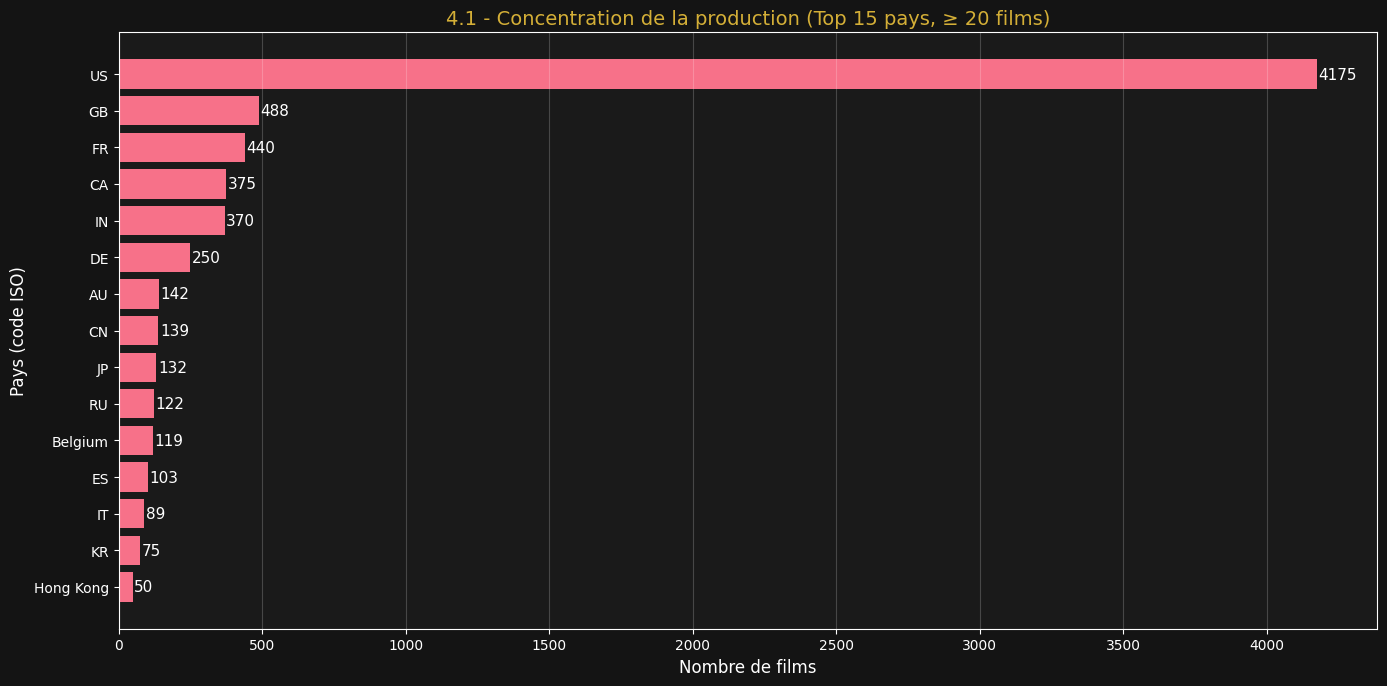

💾 Sauvegardé : ../outputs/figures/chap4_01_top_pays_volume.png


In [4]:
# ==============================================================================
# 4.1 - Question : Où se concentre la production ?
# ==============================================================================
TOP_N = 15
MIN_FILMS_41 = 20

top_prod = (country_stats[country_stats["nb_films"] >= MIN_FILMS_41]
            .sort_values("nb_films", ascending=False)
            .head(TOP_N))

plt.figure(figsize=(14, 7))
plt.barh(top_prod["main_country"], top_prod["nb_films"])
plt.gca().invert_yaxis()
plt.title(f"4.1 - Concentration de la production (Top {TOP_N} pays, ≥ {MIN_FILMS_41} films)",
          color=COLORS["secondary"])
plt.xlabel("Nombre de films")
plt.ylabel("Pays (code ISO)")

for i, v in enumerate(top_prod["nb_films"]):
    plt.text(v + 5, i, f"{int(v)}", va="center")

plt.grid(axis="x", alpha=0.2)
plt.tight_layout()

out_41 = "../outputs/figures/chap4_01_top_pays_volume.png"
plt.savefig(out_41, dpi=300)
plt.show()
print("💾 Sauvegardé :", out_41)


In [5]:
# ==============================================================================
# 4.3 — RISQUE INVESTISSEUR PAR PAYS
# ==============================================================================

country_risk = (
    df.groupby("main_country")
      .agg(
          nb_films=("title", "count"),
          profit_rate=("is_profitable", "mean"),
          roi_mean=("roi", "mean")
      )
      .reset_index()
)

# Garder les pays statistiquement significatifs
country_risk = country_risk[country_risk["nb_films"] >= 20]

# Conversion en %
country_risk["profit_rate"] = country_risk["profit_rate"] * 100

# Top 15 pays par volume
country_risk = country_risk.sort_values("nb_films", ascending=False).head(15)

country_risk


,main_country,nb_films,profit_rate,roi_mean
72,US,4175,67.808383,72.961424
29,GB,488,65.163934,3.236776
27,FR,440,54.772727,1.882073
11,CA,375,56.800000,2.123977
34,IN,370,85.675676,4.802965
20,DE,250,53.600000,1.242753
0,AU,142,60.563380,2.665353
12,CN,139,69.064748,4.534277
41,JP,132,69.696970,7.411323
60,RU,122,57.377049,1.374473


📁 Dossier de sortie : ../outputs/figures


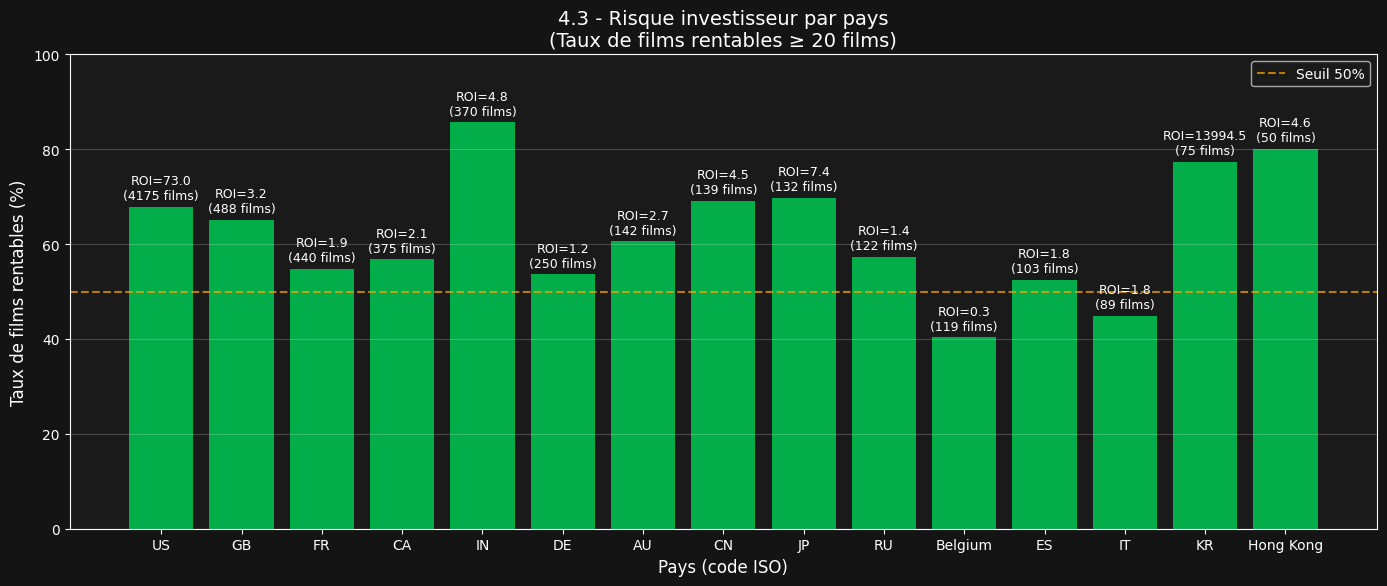

💾 Sauvegardé : ../outputs/figures/chap4_03_risque_par_pays_profit_rate.png


In [7]:
import os

OUT_DIR = "../outputs/figures"
os.makedirs(OUT_DIR, exist_ok=True)

print("📁 Dossier de sortie :", OUT_DIR)

plt.figure(figsize=(14,6))

bars = plt.bar(
    country_risk["main_country"],
    country_risk["profit_rate"],
    color=COLORS["success"],
    alpha=0.85
)

plt.axhline(50, color="orange", linestyle="--", alpha=0.7, label="Seuil 50%")

plt.title(
    "4.3 - Risque investisseur par pays\n(Taux de films rentables ≥ 20 films)",
    fontsize=14
)
plt.xlabel("Pays (code ISO)")
plt.ylabel("Taux de films rentables (%)")

# Annotations : ROI moyen + nb films
for bar, _, row in zip(bars, range(len(country_risk)), country_risk.itertuples()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"ROI={row.roi_mean:.1f}\n({row.nb_films} films)",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.2)
plt.legend()
plt.tight_layout()

out_43 = f"{OUT_DIR}/chap4_03_risque_par_pays_profit_rate.png"
plt.savefig(out_43, dpi=300)
plt.show()

print("💾 Sauvegardé :", out_43)


In [8]:

# sécuriser les types
df["is_profitable"] = pd.to_numeric(df["is_profitable"], errors="coerce")
df["budget_million"] = pd.to_numeric(df["budget_million"], errors="coerce")
df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")

# filtrage léger (évite valeurs manquantes sur les features du chap 5)
df5 = df.dropna(subset=["is_profitable", "budget_million", "runtime", "season", "budget_category", "main_genre"]).copy()
df5["is_profitable"] = df5["is_profitable"].astype(int)

print("\n" + "="*80)
print("CHAPITRE 5 : PORTRAIT-ROBOT DU FILM RENTABLE (pré-sortie)")
print("="*80)



CHAPITRE 5 : PORTRAIT-ROBOT DU FILM RENTABLE (pré-sortie)


🎭 Genres les plus stables (top 5) : ['TV Movie', 'Unknown', 'Family', 'Fantasy', 'Horror']


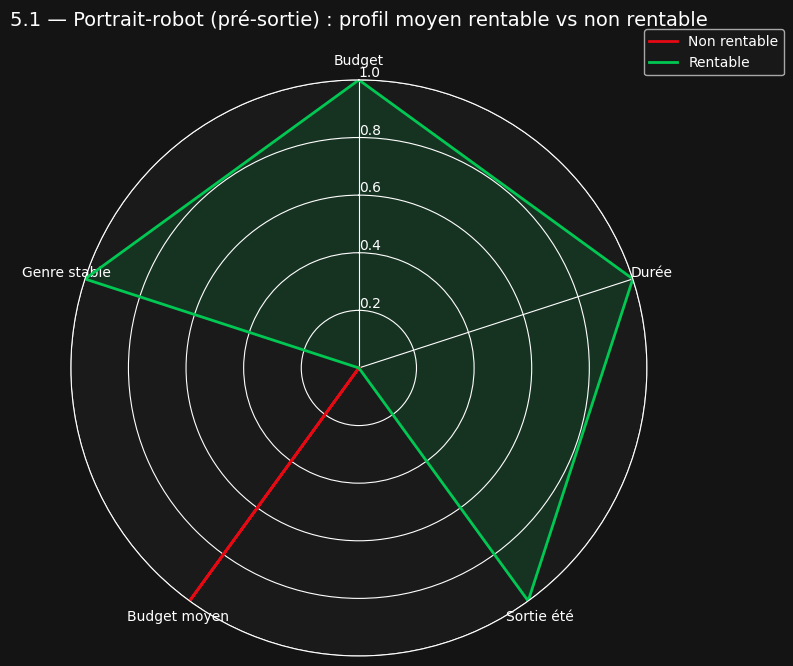

💾 Sauvegardé : ../outputs/figures/chap5_01_radar_portrait_robot.png


In [9]:
# ==============================================================================
# 5.1 — Radar : profil type rentable vs non rentable (pré-sortie)
# ==============================================================================

# 1) définir "genres plus stables" = top 5 genres par profit_rate (sur tout df5)
genre_profit = (df5.groupby("main_genre")["is_profitable"].mean()
                .sort_values(ascending=False))
safe_genres = genre_profit.head(5).index.tolist()
print("🎭 Genres les plus stables (top 5) :", safe_genres)

df5["is_safe_genre"] = df5["main_genre"].isin(safe_genres).astype(int)
df5["is_summer"] = (df5["season"] == "Été").astype(int)
df5["is_mid_budget"] = (df5["budget_category"] == "Moyen (10-50M)").astype(int)

# 2) calcul des indicateurs par classe (rentable / non)
profile = (df5.groupby("is_profitable")
           .agg(
               budget_mean=("budget_million", "mean"),
               runtime_mean=("runtime", "mean"),
               summer_share=("is_summer", "mean"),
               mid_budget_share=("is_mid_budget", "mean"),
               safe_genre_share=("is_safe_genre", "mean"),
           )
           .reset_index())

# 3) normalisation simple 0-1 (pour radar)
# (ici OK car on ne met pas de revenue/roi explosifs)
metrics = ["budget_mean", "runtime_mean", "summer_share", "mid_budget_share", "safe_genre_share"]
profile_norm = profile.copy()
for m in metrics:
    minv, maxv = profile_norm[m].min(), profile_norm[m].max()
    if maxv - minv == 0:
        profile_norm[m] = 0.5
    else:
        profile_norm[m] = (profile_norm[m] - minv) / (maxv - minv)

# 4) plot radar (matplotlib polar)
labels = ["Budget", "Durée", "Sortie été", "Budget moyen", "Genre stable"]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

def radar_values(row):
    vals = row[metrics].tolist()
    vals += vals[:1]
    return vals

row_non = profile_norm[profile_norm["is_profitable"] == 0].iloc[0]
row_yes = profile_norm[profile_norm["is_profitable"] == 1].iloc[0]

vals_non = radar_values(row_non)
vals_yes = radar_values(row_yes)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1)

ax.plot(angles, vals_non, linewidth=2, label="Non rentable", color=COLORS["primary"])
ax.fill(angles, vals_non, alpha=0.15, color=COLORS["primary"])

ax.plot(angles, vals_yes, linewidth=2, label="Rentable", color=COLORS["success"])
ax.fill(angles, vals_yes, alpha=0.15, color=COLORS["success"])

plt.title("5.1 — Portrait-robot (pré-sortie) : profil moyen rentable vs non rentable", pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.10))
plt.tight_layout()

out_51 = f"{OUT_DIR}/chap5_01_radar_portrait_robot.png"
plt.savefig(out_51, dpi=300)
plt.show()
print("💾 Sauvegardé :", out_51)


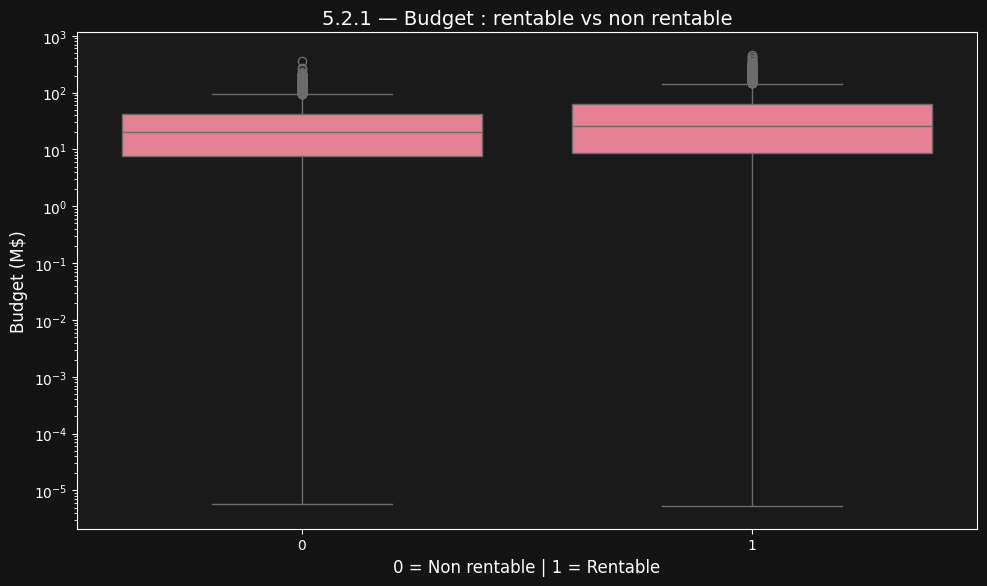

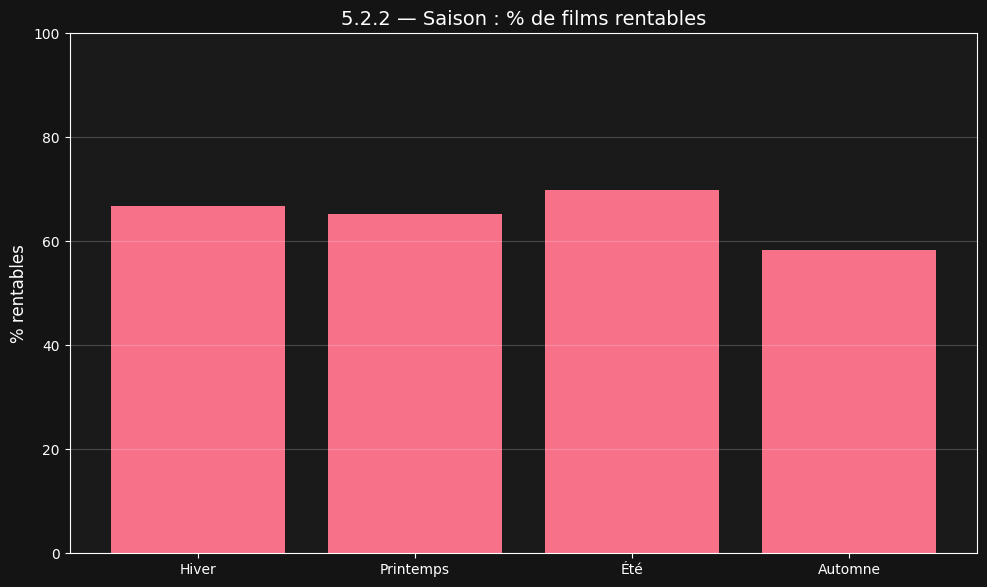

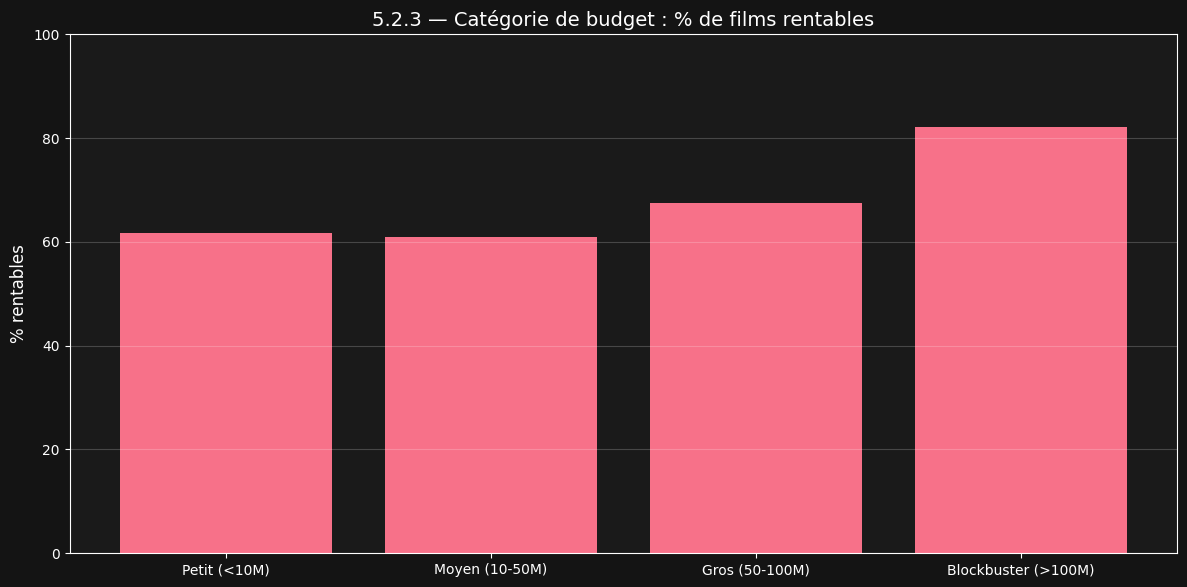

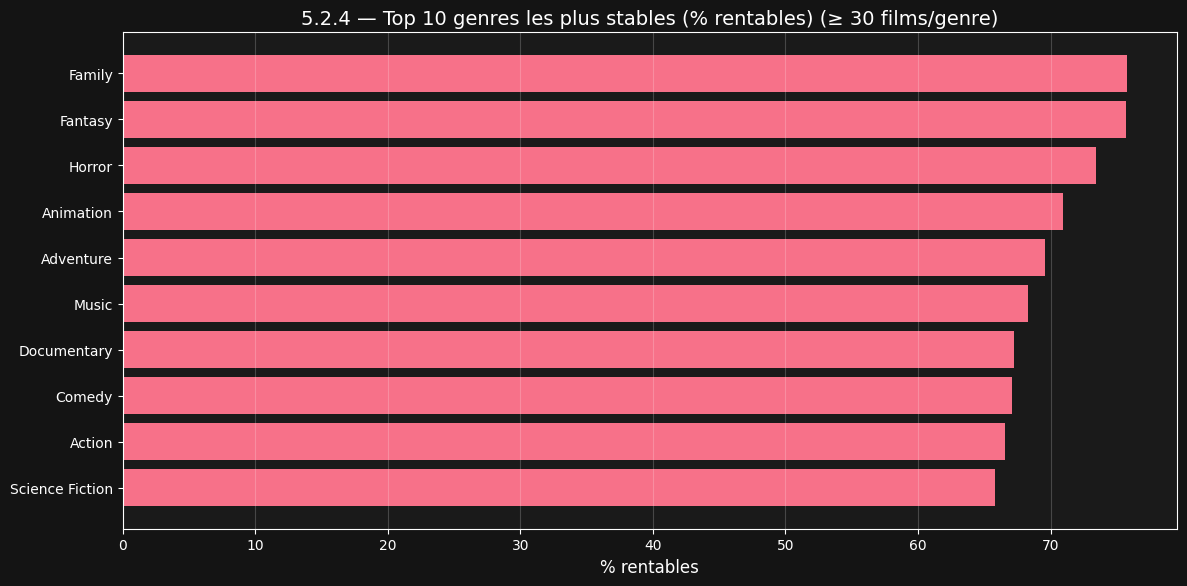

In [10]:
# ==============================================================================
# 5.2 — Caractéristiques comparées (pré-sortie) — VERSION PERTINENTE INVESTISSEUR
# Objectif : identifier des signaux AVANT sortie (budget, timing, genre)
# ==============================================================================

# 5.2.1 Budget : boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df5, x="is_profitable", y="budget_million")
plt.title("5.2.1 — Budget : rentable vs non rentable")
plt.xlabel("0 = Non rentable | 1 = Rentable")
plt.ylabel("Budget (M$)")
plt.yscale("log")  # utile car budgets très étalés
plt.tight_layout()
plt.show()

# 5.2.2 Saison : taux de rentabilité
season_order = ["Hiver", "Printemps", "Été", "Automne"]
season_rate = (df5.groupby("season")["is_profitable"].mean() * 100).reindex(season_order)

plt.figure(figsize=(10,6))
plt.bar(season_rate.index, season_rate.values)
plt.title("5.2.2 — Saison : % de films rentables")
plt.ylabel("% rentables")
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

# 5.2.3 Catégorie budget : taux de rentabilité
budget_order = ["Petit (<10M)", "Moyen (10-50M)", "Gros (50-100M)", "Blockbuster (>100M)"]
budget_rate = (df5.groupby("budget_category")["is_profitable"].mean() * 100).reindex(budget_order)

plt.figure(figsize=(12,6))
plt.bar(budget_rate.index, budget_rate.values)
plt.title("5.2.3 — Catégorie de budget : % de films rentables")
plt.ylabel("% rentables")
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

# 5.2.4 Genres : Top 10 genres les plus stables (% rentables)
# (on filtre un minimum de films par genre pour éviter les conclusions fragiles)
MIN_FILMS_GENRE = 30
genre_counts = df5["main_genre"].value_counts()
valid_genres = genre_counts[genre_counts >= MIN_FILMS_GENRE].index

genre_rate = (
    df5[df5["main_genre"].isin(valid_genres)]
      .groupby("main_genre")["is_profitable"]
      .mean() * 100
).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(genre_rate.index[::-1], genre_rate.values[::-1])
plt.title(f"5.2.4 — Top 10 genres les plus stables (% rentables) (≥ {MIN_FILMS_GENRE} films/genre)")
plt.xlabel("% rentables")
plt.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()


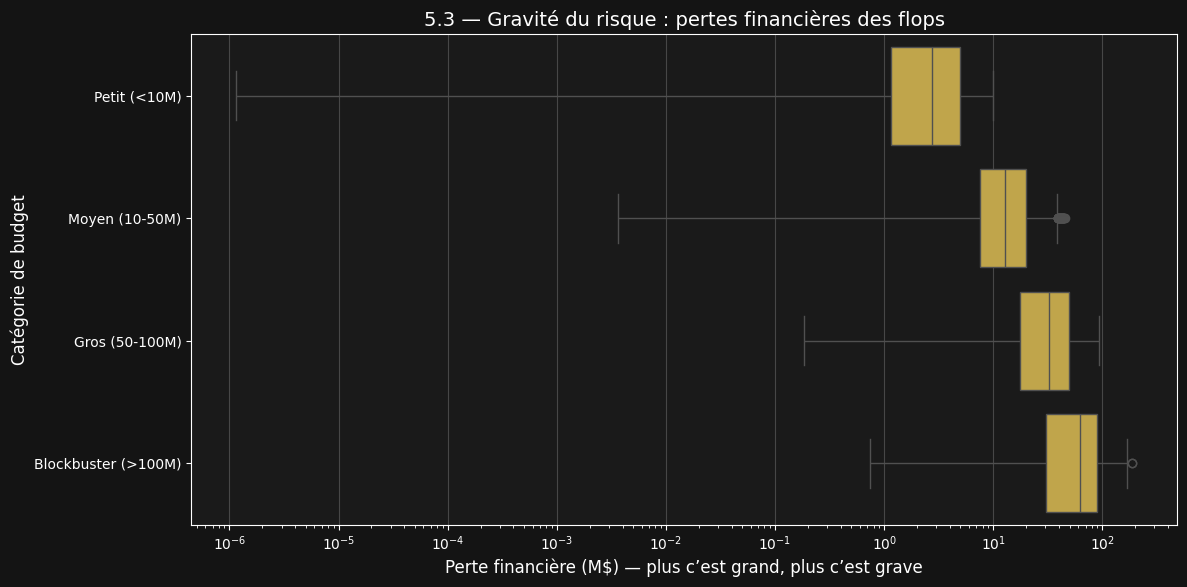

In [15]:
# Flops : ROI < 0
flops = df[df["roi"] < 0].copy()

# Perte positive en M$ (budget - revenue)
flops["loss_million"] = (flops["budget"] - flops["revenue"]) / 1e6

# On garde les pertes strictement positives
flops = flops[flops["loss_million"] > 0]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=flops,
    y="budget_category",
    x="loss_million",
    order=budget_order,
    color="#D4AF37"
)

plt.title("5.3 — Gravité du risque : pertes financières des flops")
plt.xlabel("Perte financière (M$) — plus c’est grand, plus c’est grave")
plt.ylabel("Catégorie de budget")
plt.xscale("log")
plt.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()
